# Lagrangian output file analysis

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
%matplotlib inline

In [36]:
shihan_all = xr.open_dataset('compare_lagrangian/netcdf/shihan_original.nc')
shihan_new = xr.open_dataset('compare_lagrangian/netcdf/all_shihan.nc')
ashu_all = xr.open_dataset('compare_lagrangian/netcdf/ashu.nc')
shihan_winds = xr.open_dataset('compare_lagrangian/netcdf/shihan_winds.nc')
shihan_currents = xr.open_dataset('compare_lagrangian/netcdf/shihan_currents.nc')

## Oil Concentration 2D

In [116]:
shihan_all.OilConcentration_2D.where(shihan_all.OilConcentration_2D==shihan_all.OilConcentration_2D.max(), drop=True)

<xarray.DataArray 'OilConcentration_2D' (time: 1, grid_y: 1, grid_x: 1)>
array([[[258.66]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-14T22:30:00
  * grid_y   (grid_y) int16 471
  * grid_x   (grid_x) int16 328
Attributes:
    standard_name:  OilConcentration_2D
    long_name:      OilConcentration_2D
    units:          ppm

In [40]:
shihan_new.OilConcentration_2D.where(shihan_new.OilConcentration_2D==shihan_new.OilConcentration_2D.max(), drop=True)

<xarray.DataArray 'OilConcentration_2D' (time: 1, grid_y: 1, grid_x: 1)>
array([[[291.6726]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-14T21:30:00
  * grid_y   (grid_y) int16 402
  * grid_x   (grid_x) int16 313
Attributes:
    standard_name:  OilConcentration_2D
    long_name:      OilConcentration_2D
    units:          ppm

In [41]:
ashu_all.OilConcentration_2D.where(ashu_all.OilConcentration_2D==ashu_all.OilConcentration_2D.max(), drop=True)

<xarray.DataArray 'OilConcentration_2D' (time: 1, grid_y: 1, grid_x: 1)>
array([[[279.4816]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-13T02:30:00
  * grid_y   (grid_y) int16 391
  * grid_x   (grid_x) int16 310
Attributes:
    standard_name:  OilConcentration_2D
    long_name:      OilConcentration_2D
    units:          ppm

In [118]:
shihan_winds.OilConcentration_2D.where(shihan_winds.OilConcentration_2D==shihan_winds.OilConcentration_2D.max(), drop=True)

<xarray.DataArray 'OilConcentration_2D' (time: 1, grid_y: 1, grid_x: 1)>
array([[[286.4581]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-13T02:30:00
  * grid_y   (grid_y) int16 391
  * grid_x   (grid_x) int16 310
Attributes:
    standard_name:  OilConcentration_2D
    long_name:      OilConcentration_2D
    units:          ppm

In [119]:
shihan_currents.OilConcentration_2D.where(shihan_currents.OilConcentration_2D==shihan_currents.OilConcentration_2D.max(), drop=True)

<xarray.DataArray 'OilConcentration_2D' (time: 1, grid_y: 1, grid_x: 1)>
array([[[308.2624]]])
Coordinates:
  * time     (time) datetime64[ns] 2015-04-14T22:30:00
  * grid_y   (grid_y) int16 402
  * grid_x   (grid_x) int16 313
Attributes:
    standard_name:  OilConcentration_2D
    long_name:      OilConcentration_2D
    units:          ppm

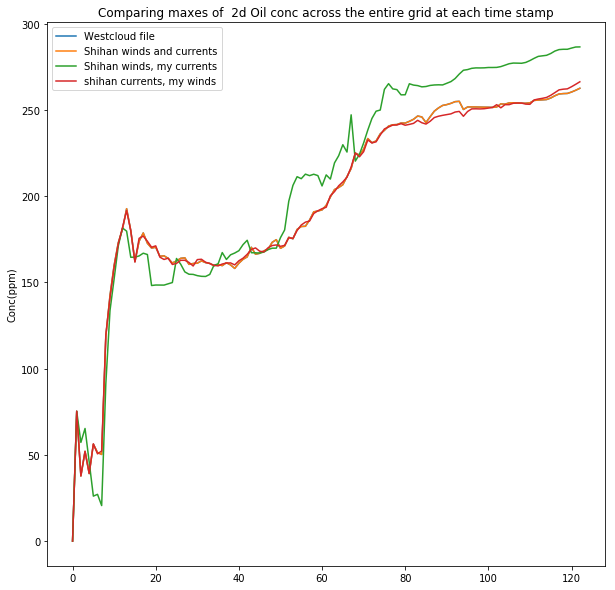

In [88]:
a,b,c,d = [],[],[],[]
for time in range(123):
    a1 = shihan_new.OilConcentration_2D.isel(time = time).where(shihan_new.OilConcentration_2D.isel(time = time)==shihan_new.OilConcentration_2D.isel(time = time).max(), drop=True)
    b1 = shihan_new.OilConcentration_2D.isel(time = time).where(shihan_new.OilConcentration_2D.isel(time = time)==shihan_new.OilConcentration_2D.isel(time = time).max(), drop=True)
    c1 = shihan_winds.OilConcentration_2D.isel(time = time).where(shihan_winds.OilConcentration_2D.isel(time = time)==shihan_winds.OilConcentration_2D.isel(time = time).max(), drop=True)
    d1 = shihan_currents.OilConcentration_2D.isel(time = time).where(shihan_currents.OilConcentration_2D.isel(time = time)==shihan_currents.OilConcentration_2D.isel(time = time).max(), drop=True)
    a.append(np.nanmax(a1.values))
    b.append(np.nanmax(b1.values))
    c.append(np.nanmax(c1.values))
    d.append(np.nanmax(d1.values))
e = range(123)
fuig = plt.figure(figsize = (10,10))  
plt.plot(e,a, label = 'Westcloud file')
plt.plot(e,b, label = 'Shihan winds and currents')
plt.plot(e,c, label = 'Shihan winds, my currents')
plt.plot(e,d, label = 'shihan currents, my winds')
plt.title('Comparing maxes of  2d Oil conc across the entire grid at each time stamp')
plt.ylabel('Conc(ppm)')
plt.legend()

Text(0.5, 1, 'Comparing 2d Oil Conc at 71st timestamp')

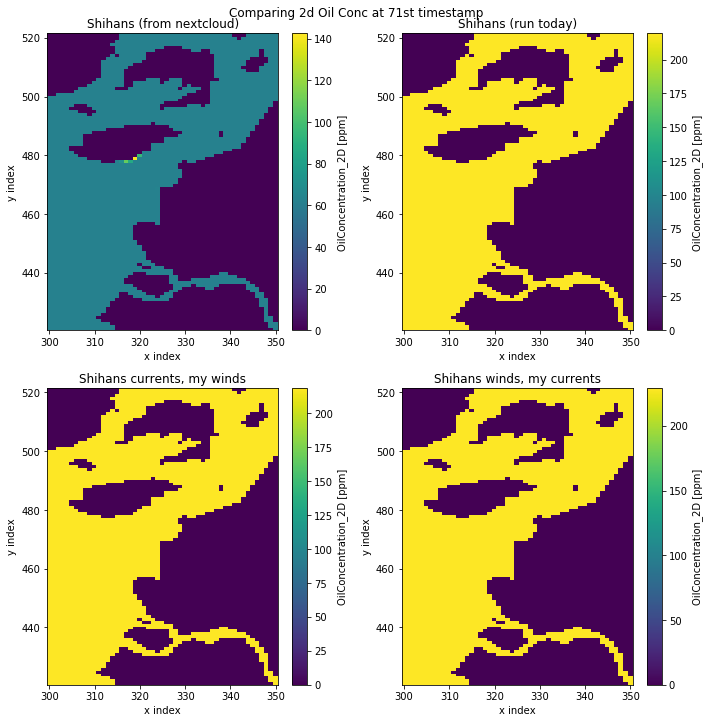

In [83]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,2,1)
shihan_all.OilConcentration_2D.isel(time = 70
).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans (from nextcloud)')
ax2 = plt.subplot(2,2,2)
shihan_new.OilConcentration_2D.isel(time = 70).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans (run today)')
ax3 = plt.subplot(2,2,3)
shihan_currents.OilConcentration_2D.isel(time = 70).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans currents, my winds')
ax4 = plt.subplot(2,2,4)
shihan_winds.OilConcentration_2D.isel(time = 70).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans winds, my currents')
fig.tight_layout()
fig.suptitle('Comparing 2d Oil Conc at 71st timestamp', y = 1)

## Oil concentration 3D

Text(0.5, 1, 'Comparing 3d Oil Conc at 71st timestamp on surface')

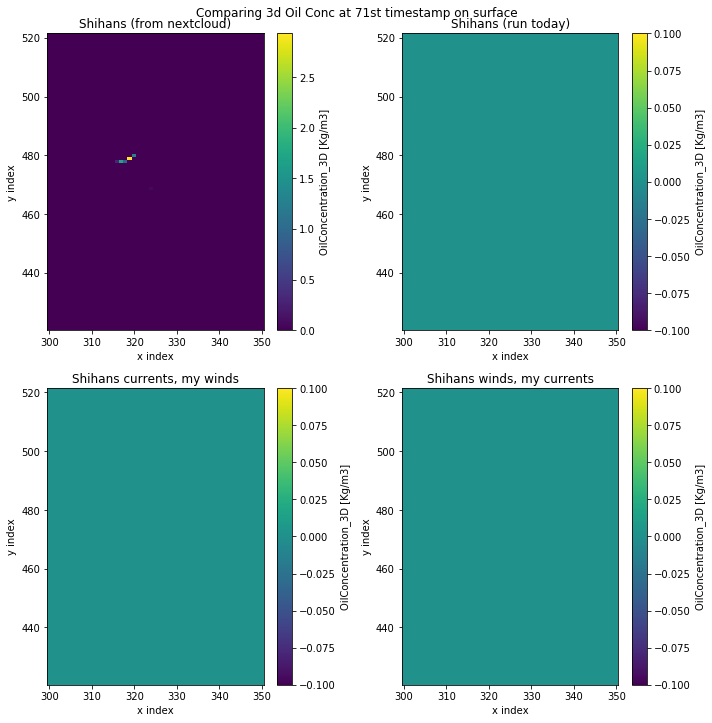

In [85]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,2,1)
shihan_all.OilConcentration_3D.isel(
    time = 70,
    grid_z = 39
).sel(
    grid_y=slice(421, 521), 
    grid_x=slice(300, 350)
).plot()
plt.title('Shihans (from nextcloud)')
ax2 = plt.subplot(2,2,2)
shihan_new.OilConcentration_3D.isel(time = 70, grid_z = 39).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans (run today)')
ax3 = plt.subplot(2,2,3)
shihan_currents.OilConcentration_3D.isel(time = 70, grid_z = 39).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans currents, my winds')
ax4 = plt.subplot(2,2,4)
shihan_winds.OilConcentration_3D.isel(time = 70, grid_z = 39).sel(grid_y=slice(421, 521), 
    grid_x=slice(300, 350)).plot()
plt.title('Shihans winds, my currents')
plt.tight_layout()
fig.suptitle('Comparing 3d Oil Conc at 71st timestamp on surface', y = 1)